# Hybrid Model


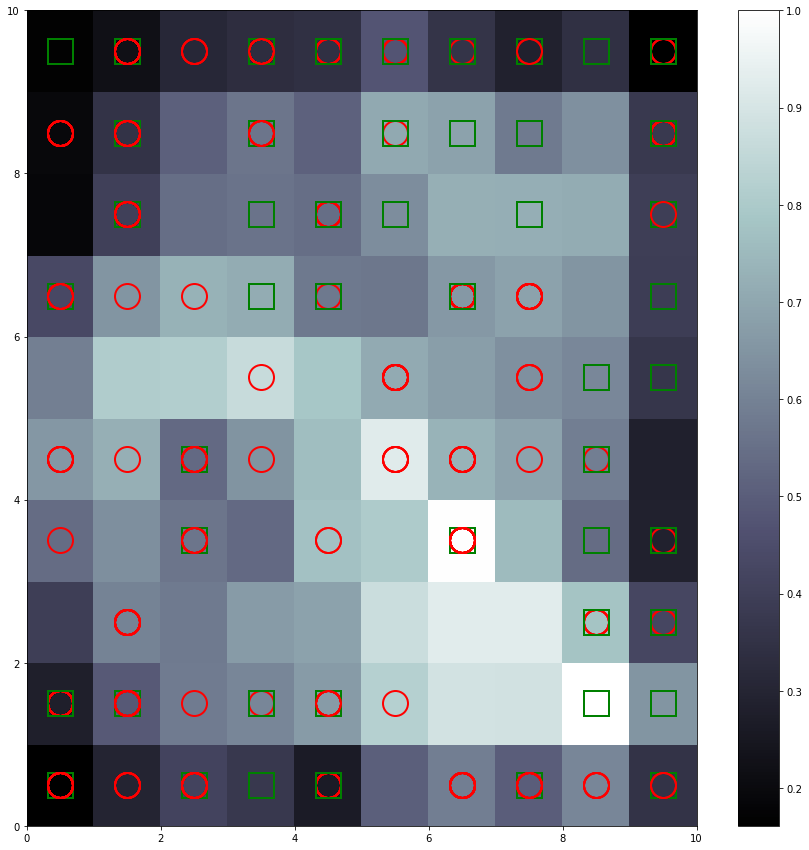

In [2]:
# Unsupervised Model - SOM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
data = pd.read_csv('Credit_Card_Applications.csv')
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X,num_iteration=100)
from pylab import bone,pcolor,colorbar,plot,show
plt.figure(figsize=(15,15))
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
color=['r','g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor=color[y[i]],
         markerfacecolor='None',
         markersize=25,
         markeredgewidth=2)
show()

In [7]:
mappings =som.win_map(X)
frauds = np.concatenate((mappings[(6,3)],mappings[(8,1)],mappings[(6,3)]),axis=0)
frauds = scaler.inverse_transform(frauds)

In [8]:
frauds.shape

(49, 15)

In [9]:
customers = data.iloc[:,1:].values
is_fraud = np.zeros(len(data))
for i in range(len(data)):
    if data.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [10]:
# Supervised Model - ANN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers = scaler.fit_transform(customers)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Dropout Regularization to overcome overfitting
model = Sequential()
model.add(Dense(2,activation='relu',input_dim=15))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(customers,is_fraud,batch_size=1,epochs=2)

Using TensorFlow backend.


Epoch 1/2
690/690 [==============================] - 2s 2ms/step - loss: 0.4738 - accuracy: 0.9522
Epoch 2/2
690/690 [==============================] - 1s 885us/step - loss: 0.2375 - accuracy: 0.9638


In [12]:
predictions = model.predict(customers)
predictions = np.concatenate((data.iloc[:,0:1].values,predictions),axis=1)

In [15]:
predictions = predictions[predictions[:,1].argsort()]

In [16]:
predictions

array([[1.57997850e+07, 5.68930991e-04],
       [1.56214230e+07, 7.26536673e-04],
       [1.58150400e+07, 4.97907447e-03],
       ...,
       [1.56471910e+07, 3.11517298e-01],
       [1.56460820e+07, 3.11517298e-01],
       [1.56058720e+07, 3.11517298e-01]])